# Création des modèles

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

## Données inchangées

On normalise juste les données, on ne fait pas d'autres manipulations (outliers, ...).

In [2]:
from sklearn.model_selection import train_test_split

# On sélectionne les colonnes d'entrée (features) et la cible
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

# On divise les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# On normalise les données continues 
from sklearn.preprocessing import StandardScaler

continuous_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()

# On applique le scaler uniquement sur les colonnes continues
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

## Modèle linéaire simple : régression logistique

On va créer un modèle linéaire simple qui va nous donner une base de performance à battre dans la suite.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=20000,random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle de régression logistique : {accuracy:.4f}")

# Afficher un rapport de classification pour des métriques plus détaillées
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Précision du modèle de régression logistique : 0.7229
Rapport de classification :
              precision    recall  f1-score   support

           1       0.67      0.67      0.67       648
           2       0.62      0.54      0.58       648
           3       0.66      0.58      0.62       648
           4       0.88      0.90      0.89       648
           5       0.76      0.79      0.77       648
           6       0.61      0.69      0.65       648
           7       0.85      0.89      0.87       648

    accuracy                           0.72      4536
   macro avg       0.72      0.72      0.72      4536
weighted avg       0.72      0.72      0.72      4536



/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


On va maintenant essayer tous les modèles classiques de classification.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# On initialise et entraîner le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# On évalue les performances
print("Précision Random Forest : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Précision Random Forest :  0.8765432098765432
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       648
           2       0.80      0.71      0.75       648
           3       0.85      0.88      0.87       648
           4       0.95      0.98      0.96       648
           5       0.90      0.95      0.93       648
           6       0.87      0.88      0.88       648
           7       0.94      0.96      0.95       648

    accuracy                           0.88      4536
   macro avg       0.87      0.88      0.87      4536
weighted avg       0.87      0.88      0.87      4536



Ce modèle permet de récupérer l'importance des features.

                               Feature  Importance
1                            Elevation    0.202691
0                                   Id    0.132456
6      Horizontal_Distance_To_Roadways    0.079460
10  Horizontal_Distance_To_Fire_Points    0.058056
14                    Wilderness_Area4    0.052549
4     Horizontal_Distance_To_Hydrology    0.048051
7                        Hillshade_9am    0.043005
5       Vertical_Distance_To_Hydrology    0.042492
2                               Aspect    0.038933
8                       Hillshade_Noon    0.037254
9                        Hillshade_3pm    0.036744
3                                Slope    0.029819
24                         Soil_Type10    0.022070
52                         Soil_Type38    0.021124
11                    Wilderness_Area1    0.017932
53                         Soil_Type39    0.016785
17                          Soil_Type3    0.016433
13                    Wilderness_Area3    0.015648
18                          Soi

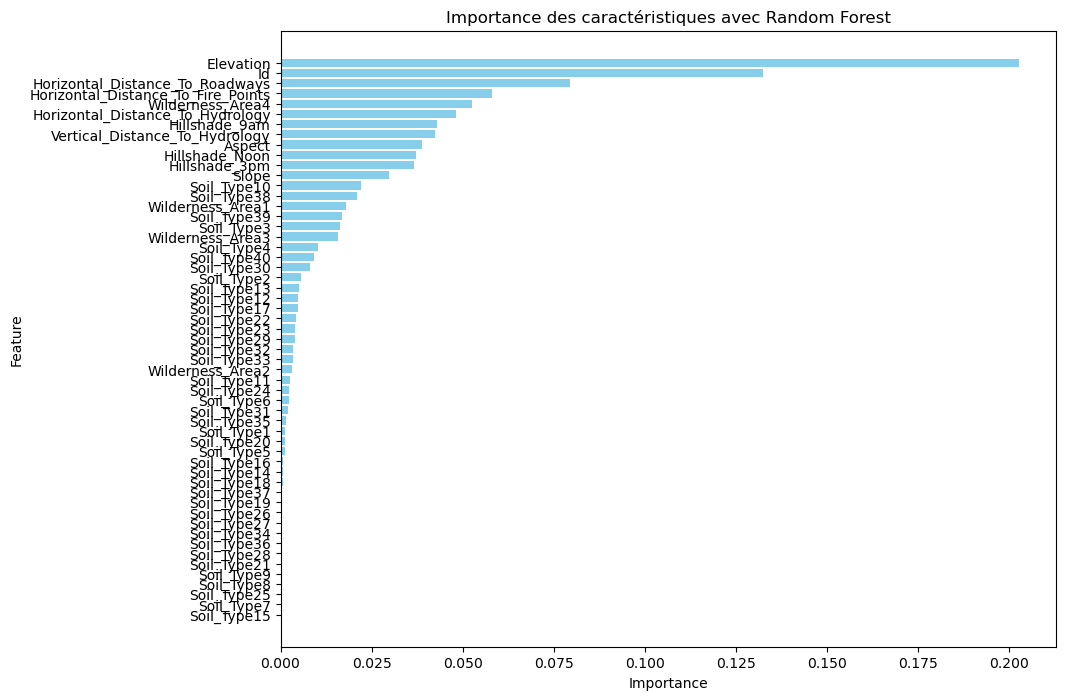

In [20]:
# On récupère les importances des features
features_importances = rf_model.feature_importances_

# On crée un DataFrame pour visualiser les importances des features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': features_importances
})

# On trie les features par importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Affiche le DataFrame trié (facultatif)
print(importance_df)

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des caractéristiques avec Random Forest")
plt.gca().invert_yaxis()  # Inverser l'axe y pour voir les caractéristiques les plus importantes en haut
plt.show()

À titre indicatif je veux sommer l'importance des Soil_type.

In [23]:
# On filtre pour garder uniquement les colonnes Soil_type
soil_type_importance_df = importance_df[importance_df['Feature'].str.startswith('Soil_Type')]

# On affiche les 10 caractéristiques les plus importantes
print(soil_type_importance_df.head(10), "\n")

# On somme
total_soil_type_importance = soil_type_importance_df['Importance'].sum()
print("Importance total des Soil_type = ", total_soil_type_importance)

        Feature  Importance
24  Soil_Type10    0.022070
52  Soil_Type38    0.021124
53  Soil_Type39    0.016785
17   Soil_Type3    0.016433
18   Soil_Type4    0.010167
54  Soil_Type40    0.009210
44  Soil_Type30    0.008014
16   Soil_Type2    0.005693
27  Soil_Type13    0.005132
26  Soil_Type12    0.004833 

Importance total des Soil_type =  0.1618357786185291


En sommant, le type de sol devient le deuxième feature le plus important.

Ce modèle est prometteur.

## XGBoost

In [26]:
import xgboost as xgb
y_ajusted = y -1
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y_ajusted, test_size=0.3, random_state=42, stratify=y)

# Paramètres de XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, 
                              n_estimators=300, max_depth=10, learning_rate=0.1, 
                              subsample=0.8, colsample_bytree=0.8, random_state=42)

# On entraîne le modèle
xgb_model.fit(X_train0, y_train0)

# On prédit sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test0)

# On évalue les performances
print("Précision XGBoost : ", accuracy_score(y_test0, y_pred_xgb))
print(classification_report(y_test0, y_pred_xgb))


Précision XGBoost :  0.8891093474426808
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       648
           1       0.80      0.74      0.77       648
           2       0.88      0.90      0.89       648
           3       0.96      0.98      0.97       648
           4       0.92      0.96      0.94       648
           5       0.91      0.91      0.91       648
           6       0.94      0.95      0.95       648

    accuracy                           0.89      4536
   macro avg       0.89      0.89      0.89      4536
weighted avg       0.89      0.89      0.89      4536



Ce modèle est prometteur.

## LightGBM

In [28]:
import lightgbm as lgb

# Paramètres de LightGBM
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=7, 
                               n_estimators=300, max_depth=10, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8, random_state=42)

# On entraîne le modèle
lgb_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred_lgb = lgb_model.predict(X_test)

# On évalue les performances
print("\n","Précision LightGBM : ", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 10584, number of used features: 45
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 Précision LightGBM :  0.8921957671957672
              precision    recall  f1-score   support

           1       0.82      0.80      0.81       648
           2       0.81      0.74      0.77       648
           3       0.88      0.91      0.89       64

Ce modèle est prometteur.

## SVM

In [33]:
from sklearn.svm import SVC

# Initialiser et entraîner le modèle SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle SVM : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle SVM : 0.3893
Rapport de classification :
               precision    recall  f1-score   support

           1       0.40      0.00      0.01       648
           2       0.49      0.40      0.44       648
           3       0.47      0.24      0.32       648
           4       0.54      0.79      0.64       648
           5       0.00      0.00      0.00       648
           6       0.25      0.57      0.35       648
           7       0.38      0.73      0.50       648

    accuracy                           0.39      4536
   macro avg       0.36      0.39      0.32      4536
weighted avg       0.36      0.39      0.32      4536



/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ce modèle est plutôt mauvais.

## K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# On initialise et entraîne le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster `n_neighbors`
knn_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# On évalue les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle KNN : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle KNN : 0.5516
Rapport de classification :
               precision    recall  f1-score   support

           1       0.39      0.38      0.38       648
           2       0.46      0.39      0.42       648
           3       0.51      0.59      0.55       648
           4       0.77      0.85      0.81       648
           5       0.52      0.53      0.52       648
           6       0.58      0.55      0.57       648
           7       0.61      0.57      0.59       648

    accuracy                           0.55      4536
   macro avg       0.55      0.55      0.55      4536
weighted avg       0.55      0.55      0.55      4536



On optimise les hyperparamètres.

In [42]:
from sklearn.model_selection import GridSearchCV

# On définit la grille d'hyperparamètres
param_grid = {
    'n_neighbors': [35, 40, 60, 75,80, 85, 90],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# On configurer et exécuter GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

# On évalue le modèle optimisé sur l'ensemble de test
best_knn_model = grid_search.best_estimator_
y_pred_optimized = best_knn_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Précision du modèle KNN optimisé : {accuracy_optimized:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred_optimized))

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'distance'}
Précision du modèle KNN optimisé : 0.6651
Rapport de classification :
               precision    recall  f1-score   support

           1       0.60      0.39      0.47       648
           2       0.63      0.44      0.52       648
           3       0.65      0.70      0.67       648
           4       0.79      0.91      0.84       648
           5       0.63      0.72      0.67       648
           6       0.64      0.69      0.66       648
           7       0.67      0.81      0.73       648

    accuracy                           0.67      4536
   macro avg       0.66      0.67      0.65      4536
weighted avg       0.66      0.67      0.65      4536



Ce modèle est peu prometteur.